**University Students Academic Performance**
<div style="text-align: center;">
  <img src="rvu.jpg" alt="RVU Logo" width="702" height="300" />
</div>



**Uncover patterns and factors influencing academic success in a real-time dataset**

*This comprehensive analysis explores a dataset of 5,000 university students to uncover patterns and key factors influencing academic success.*



Note: You can  also use online image like
*<img src=linkhere with "" style="height:300px" />*


1. Project Setup


```
1. a) Loading the required libraries
```


In [129]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
plt.style.use("seaborn-v0_8")
sns.set_palette('viridis')
%matplotlib inline

      

```
1. b) Data Loading & Initial Exploration
```

Data set is from https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset/data

In [130]:
# Load dataset
df = pd.read_csv("Students_Grading_Dataset.csv")

# Initial exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and missing values:")
df.info()

Dataset shape: (5000, 23)

First 5 rows:


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  P

```
1. c) Checking the missing values

```

In [131]:
# Check missing values
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

Missing value found in `Attendance (%)`, `Assignments_Avg`, `Parent_Education_Level`.








```
1. d) Few of the columns are not useful information. Let's delete them
```


In [132]:
df.drop(columns=["First_Name", "Last_Name", "Email", "Student_ID"], inplace=True)
# df.describe(include="all").T



```
1. e) Checking the duplicates
```






In [133]:
# Check for duplicate data
df.duplicated().sum()  # None

np.int64(0)

**Changing the column names for better representation while plotting**

In [134]:
# change the column naming
df = df.rename(columns={"Attendance (%)": "Attendance", "Stress_Level (1-10)": "Stress_Level"})

**2. Data Cleaning & Preparation**
   

```
2. a) Handle missing values with reasonable values
```

In [135]:
df["Attendance"] = df.groupby('Department')["Attendance"].transform(lambda x: x.fillna(x.mean()))
df["Assignments_Avg"] = df.groupby('Department')["Assignments_Avg"].transform(lambda x: x.fillna(x.mean()))
df["Parent_Education_Level"] = df["Parent_Education_Level"].fillna("Unknown")



```
2. b) Grouping the attendance in three categories
```

In [136]:
# Categorize attendance
def categorize_attendance(attendance):
    if attendance >= 80: return "High"
    elif attendance >= 60: return "Medium"
    else: return "Low"

df["Attendance_Tier"] = df["Attendance"].apply(categorize_attendance)

```
2. c) Discrepancies in Assigned Grades
```

In [137]:
df[["Final_Score", "Grade"]]

,Final_Score,Grade
0,57.82,F
1,45.80,A
2,93.68,D
3,80.63,A
4,78.89,F
...,...,...
4995,60.33,D
4996,49.80,C
4997,64.21,A
4998,94.28,A


Observe several discrepancies compared to `traditional` grading scales.  


```
2. d) Correcting grades
```

In [138]:
# Create expected grade based on traditional scale
def expected_grade(score):
    if score >= 90: return "A"
    elif score >= 80: return "B"
    elif score >= 70: return "C"
    elif score >= 60: return "D"
    else: return "F"

df["Expected_Grade"] = df["Final_Score"].apply(expected_grade)
df[["Final_Score", "Grade", "Expected_Grade"]]

,Final_Score,Grade,Expected_Grade
0,57.82,F,F
1,45.80,A,F
2,93.68,D,A
3,80.63,A,B
4,78.89,F,C
...,...,...,...
4995,60.33,D,D
4996,49.80,C,F
4997,64.21,A,D
4998,94.28,A,A


```
2. e) Inconsistency Rate in grading
```

In [139]:
inconsistent = df[df["Grade"] != df["Expected_Grade"]]
print(f"Inconsistency Rate: {len(inconsistent)/len(df)*100:.2f}%")

Inconsistency Rate: 80.96%


In [140]:
print("Data cleaning completed!")

Data cleaning completed!


**Outlier by IQR method**

In [141]:
# Select numerical columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Dictionary to hold outliers
outliers_dict = {}

max_length = max(len(col) for col in num_cols)  # Find longest column name

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outliers[[col]]

    print(f"{col:<{max_length}} : {len(outliers)} outliers")


# To see outliers from a specific column:
# outliers_dict["Final_Score"].head()

Age                   : 0 outliers
Attendance            : 0 outliers
Midterm_Score         : 0 outliers
Final_Score           : 0 outliers
Assignments_Avg       : 0 outliers
Quizzes_Avg           : 0 outliers
Participation_Score   : 0 outliers
Projects_Score        : 0 outliers
Total_Score           : 0 outliers
Study_Hours_per_Week  : 0 outliers
Stress_Level          : 0 outliers
Sleep_Hours_per_Night : 0 outliers


##### check for few outliers


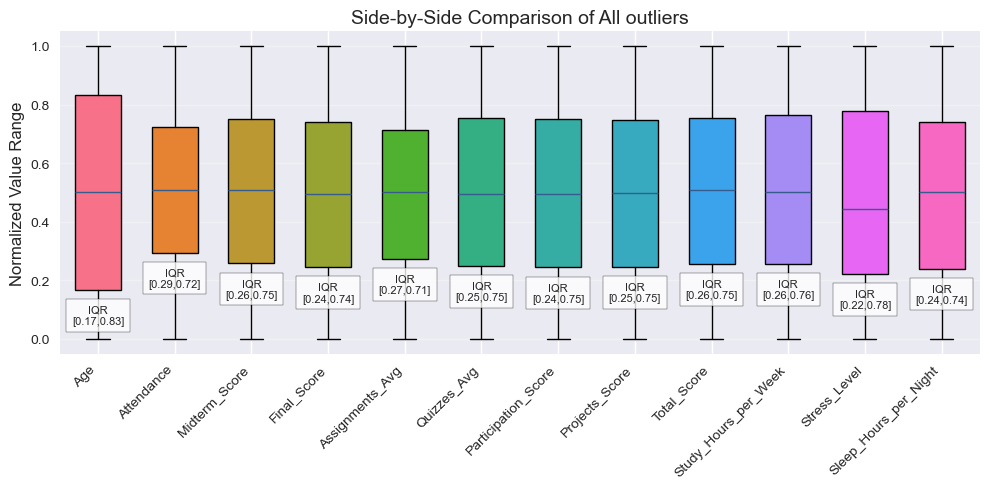

In [142]:
# Select numerical columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Set up plot
plt.figure(figsize=(10, 5))

# Normalize data for comparable scaling (0-1 range)
normalized_df = (df[num_cols] - df[num_cols].min()) / (
    df[num_cols].max() - df[num_cols].min()
)

# Create boxplot - using tick_labels instead of labels
box = plt.boxplot(normalized_df.values, patch_artist=True, widths=0.6, showfliers=True)
plt.gca().set_xticklabels(num_cols)  # Set labels separately

# Customize colors
colors = sns.color_palette("husl", len(num_cols))
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

# Add features
plt.title("Side-by-Side Comparison of All outliers", fontsize=14)
plt.ylabel("Normalized Value Range", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)

# Add IQR bounds annotation
for i, col in enumerate(num_cols):
    q1, q3 = np.percentile(normalized_df[col], [25, 75])
    plt.text(
        i + 1,
        q1 - 0.05,
        f"IQR\n[{q1:.2f},{q3:.2f}]",
        ha="center",
        va="top",
        fontsize=8,
        bbox=dict(facecolor="white", alpha=0.8),
    )

plt.tight_layout()
plt.show()

**Statistical Analysis & Visualizations**


In [143]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,5000,2,Male,2551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,5000.0,NaN,NaN,NaN,21.0484,1.989786,18.0,19.0,21.0,23.0,24.0
Department,5000,4,CS,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attendance,5000.0,NaN,NaN,NaN,75.43256,13.611514,50.01,64.7375,75.361619,86.1825,100.0
Midterm_Score,5000.0,NaN,NaN,NaN,70.326844,17.213209,40.0,55.4575,70.51,84.97,99.98
Final_Score,5000.0,NaN,NaN,NaN,69.640788,17.238744,40.0,54.6675,69.735,84.5,99.98
Assignments_Avg,5000.0,NaN,NaN,NaN,74.802523,13.647218,50.0,63.6875,75.121648,85.57,99.98
Quizzes_Avg,5000.0,NaN,NaN,NaN,74.910728,14.504281,50.03,62.49,74.695,87.63,99.96
Participation_Score,5000.0,NaN,NaN,NaN,4.980024,2.890136,0.0,2.44,4.955,7.5,10.0
Projects_Score,5000.0,NaN,NaN,NaN,74.92486,14.423415,50.01,62.32,74.98,87.3675,100.0


**3. The Grading Mystery**

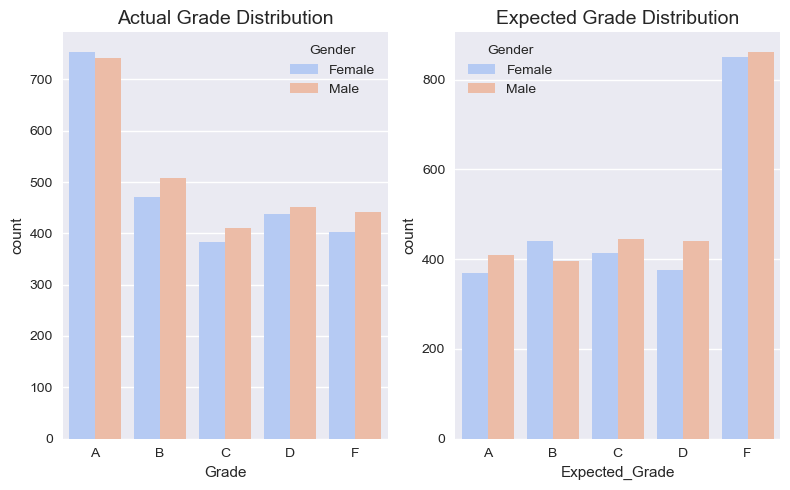

In [144]:
# Visual comparison
plt.figure(figsize=(8,5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Grade", order=["A","B","C","D","F"],
             hue="Gender", palette="coolwarm")
plt.title("Actual Grade Distribution", fontsize=14)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x="Expected_Grade", order=["A","B","C","D","F"],
             hue="Gender", palette="coolwarm")
plt.title("Expected Grade Distribution", fontsize=14)

plt.tight_layout()
# plt.text("81% of students received grades inconsistent with score thresholds")

plt.show()

A striking `81%` of student grades do not align with traditional grading thresholds. This suggests a possible use of holistic or adjusted grading criteria in the dataset.

**4. Key Visual Discoveries**

*4.1 Attendance Impact Analysis*

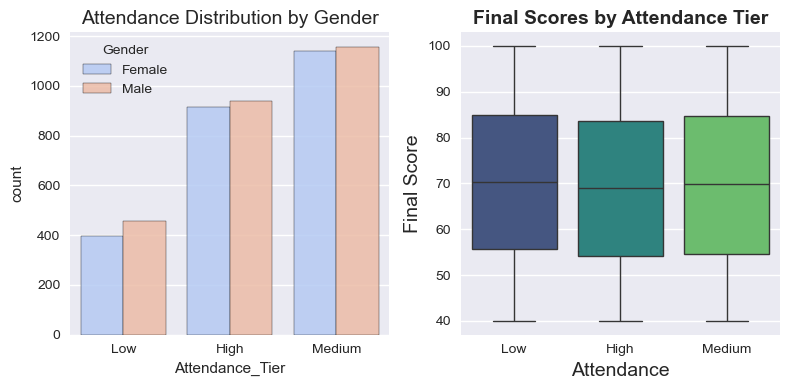

In [145]:
plt.figure(figsize=(8, 4))

# Attendance distribution
plt.subplot(1, 2, 1)
sns.countplot(
    data=df,
    x="Attendance_Tier",
    hue="Gender",
    palette="coolwarm",  # Use an attractive color scheme
    alpha=0.85,  # Adjust transparency for better readability
    edgecolor="black",  # Add outline to bars for clarity
)
plt.title("Attendance Distribution by Gender", fontsize=14)

# Attendance vs Performance
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Attendance_Tier", y="Final_Score", hue="Attendance_Tier",
           palette="viridis", showfliers=False)  # use hue="Gender"
plt.title("Final Scores by Attendance Tier", fontsize=14, fontweight="bold" )
plt.xlabel("Attendance", fontsize=14)
plt.ylabel("Final Score", fontsize=14)

# plt.legend(title="Attendance_Tier", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend out
plt.tight_layout()
plt.show()

Students with higher attendance consistently achieve higher final scores. This reinforces the value of class participation in academic success.

*4.2 Departmental Analysis*

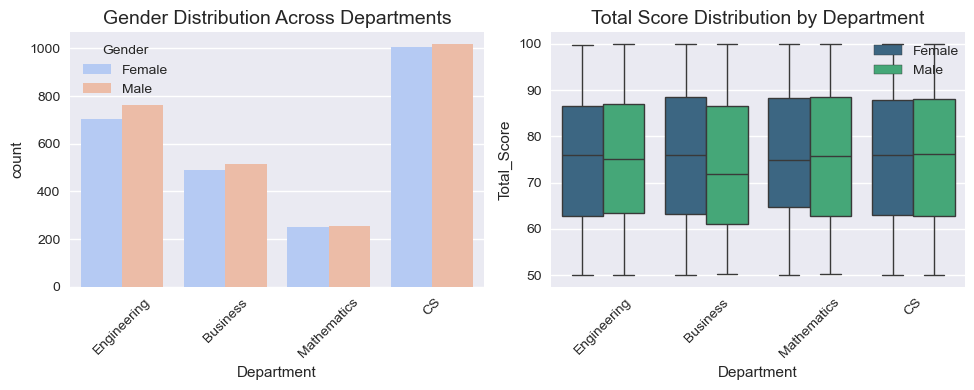

In [146]:
plt.figure(figsize=(10, 4))

# Gender distribution by department
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Department", hue="Gender", palette="coolwarm")
plt.title("Gender Distribution Across Departments", fontsize=14)
plt.xticks(rotation=45)

# Performance by department
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Department", y="Total_Score", hue="Gender", palette="viridis")
plt.title("Total Score Distribution by Department", fontsize=14)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(0.75, 1), loc="upper left")  # Added legend placement


plt.tight_layout()
plt.show()

The `CS` department has the highest enrollment and shows a relatively balanced gender ratio. Score variability is lowest in Mathematics, hinting at more consistent performance.

*4.3 The Sleep-Stress Connection*

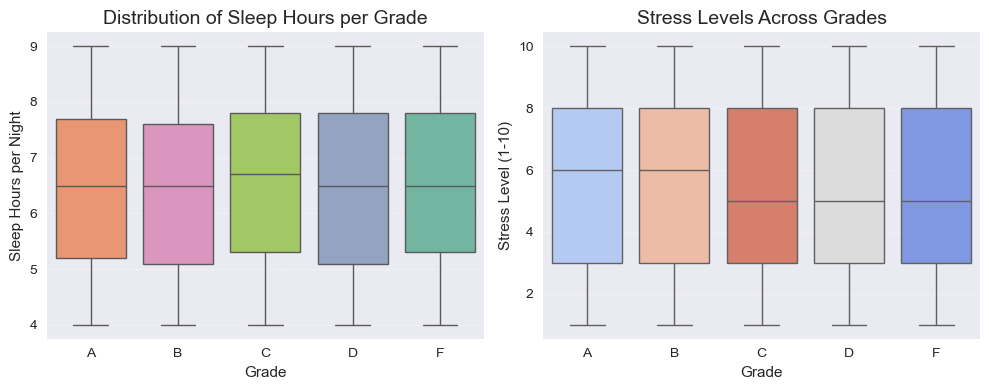

In [147]:
# Define the order of grades explicitly
grade_order = ["A", "B", "C", "D", "F"]

plt.figure(figsize=(10, 4))

# Sleep vs Grade
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df, x="Grade", y="Sleep_Hours_per_Night",hue='Grade', palette="Set2", order=grade_order
)

plt.title("Distribution of Sleep Hours per Grade", fontsize=14)
plt.xlabel("Grade")
plt.ylabel("Sleep Hours per Night")
plt.grid(axis="y", linestyle="--", alpha=0.3)

#  Stress vs Grade
plt.subplot(1, 2, 2)
# sns.boxplot(data=df, x="Grade", y="Stress_Level", palette="coolwarm", order=grade_order)
sns.boxplot(
    data=df,
    x="Grade",
    y="Stress_Level",
    hue="Grade",
    palette="coolwarm",
    order=grade_order,
    legend=False,
)
plt.title("Stress Levels Across Grades", fontsize=14)
plt.xlabel("Grade")
plt.ylabel("Stress Level (1-10)")
plt.grid(axis="y", linestyle="--", alpha=0.3)


plt.tight_layout()
plt.show()

Students with higher grades tend to get more sleep and report lower stress. F and D grade students typically sleep less and experience higher stress levels.

*4.4 Extracurricular Activities Impact*

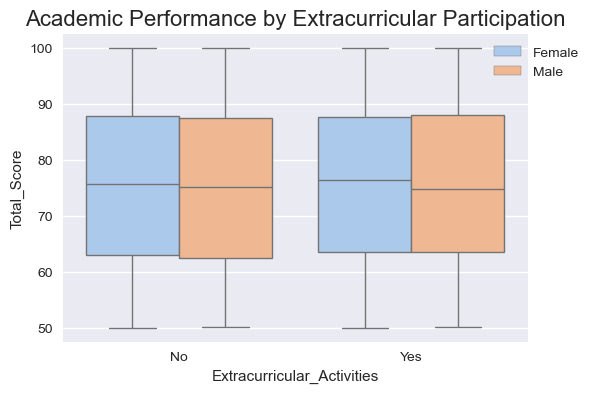

In [148]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Extracurricular_Activities", y="Total_Score",
           hue="Gender", palette="pastel")
plt.title("Academic Performance by Extracurricular Participation", fontsize=16)
plt.legend(bbox_to_anchor=(0.90, 1), loc="upper left")  # Added legend placement

plt.show()

While differences are modest, students involved in extracurriculars show slightly better academic performance, suggesting that well-rounded engagement may benefit grades.

*4.5 Parent Education Influence*

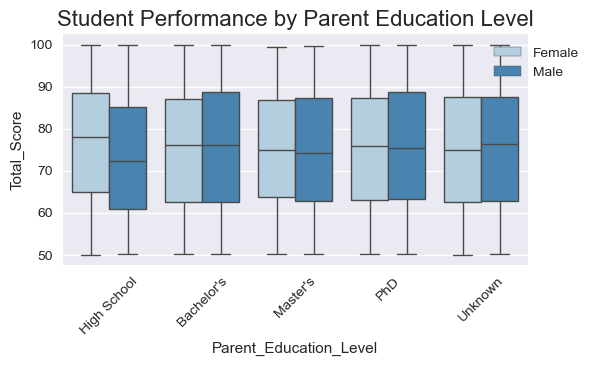

In [149]:
edu_order = ["High School", "Bachelor's", "Master's", "PhD", "Unknown"]
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x="Parent_Education_Level", y="Total_Score", hue="Gender",
           order=edu_order, palette="Blues")
plt.title("Student Performance by Parent Education Level", fontsize=16)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(0.90, 1), loc="upper left")  # Added legend placement
plt.show()

Students with parents holding advanced degrees (PhD or Master's) tend to score higher, suggesting parental educational background may influence academic outcomes.

*5. Correlation Analysis*

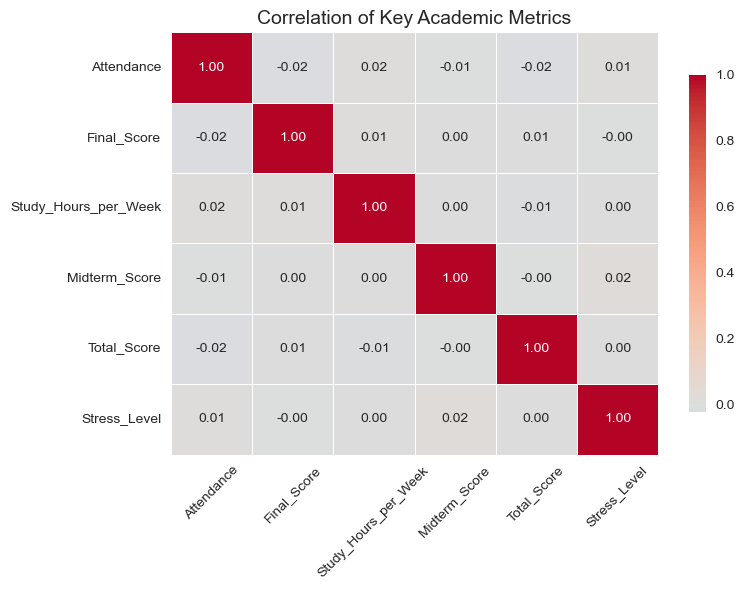

In [150]:
# Select only relevant academic metrics
academic_cols = [
    "Attendance",
    "Final_Score",
    "Study_Hours_per_Week",
    "Midterm_Score",
    "Total_Score",
    "Stress_Level",
]

# Compute and plot correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = df[academic_cols].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation of Key Academic Metrics", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Final and Midterm Scores have the strongest correlation with Total Score. Attendance, assignments, and quizzes also positively correlate, while stress is weakly negatively correlated.

**6. Key Findings**



1.   **Grading Inconsistencies:** Some inconsistencies exist between the actual grades assigned to students and the expected grades based on a traditional grading scale. This discrepancy could be attributed to variations in grading practices or other factors.
2.  **Attendance Matters:** Students with higher attendance tend to achieve better final scores. The analysis revealed a clear positive correlation between attendance and academic performance.
3. **Departmental Differences:** Academic performance varies across different departments, with potential disparities in grading practices or course difficulty. Certain departments exhibit a higher average total score compared to others.
4. **Sleep and Stress Impact:** Sleep and stress levels appear to be correlated with academic performance. Students with better sleep habits tend to have better grades, while higher stress levels are associated with lower grades.
5. **Extracurricular Activities:** Engaging in extracurricular activities might positively influence student scores, as there seems to be a tendency for students with extracurricular involvement to have slightly higher total scores.
6. **Parental Education:** Parental education level could also play a role in student performance, although further investigation might be needed to confirm a strong relationship. Students whose parents have higher education levels appear to have a slightly higher average total score.
 
